In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/100000-diabetes-clinical-dataset/diabetes_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/100000-diabetes-clinical-dataset/diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [4]:
df.nunique().sort_values()

race:AfricanAmerican       2
race:Asian                 2
race:Caucasian             2
race:Hispanic              2
race:Other                 2
hypertension               2
heart_disease              2
diabetes                   2
gender                     3
smoking_history            6
year                       7
hbA1c_level               18
blood_glucose_level       18
location                  55
age                      102
bmi                     4247
dtype: int64

In [5]:
df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [6]:
df = df.drop(columns='location')

In [7]:
numerical_cols = df.select_dtypes(include='number').columns 
categorical_cols = df.select_dtypes(exclude='number').columns

In [8]:
numerical_cols

Index(['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
categorical_cols

Index(['gender', 'smoking_history'], dtype='object')

In [10]:
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first = True)
df_dummies.head()


,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,False,False,False,False,False,True,False
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,False,False,False,False,False,True,False
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,True,False,False,False,False,True,False
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,True,False,False,False,False,True,False
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,False,False,False,False,False,True,False


In [11]:
# Features
X = df_dummies.drop('diabetes', axis = 1)

# Target (alvo)
y = df_dummies['diabetes']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape, y_train.shape

((80000, 19), (80000,))

In [14]:
X_test.shape, y_test.shape

((20000, 19), (20000,))

In [15]:
import xgboost as xgb

In [16]:
#Treinar o modelo

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
#Prevendo o modelo
y_pred = xgb_classifier.predict(X_test)

In [18]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
y_test

75721    0
80184    0
19864    1
76699    0
92991    0
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: diabetes, Length: 20000, dtype: int64

In [20]:
#Acurácia

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [21]:
accuracy

0.9711

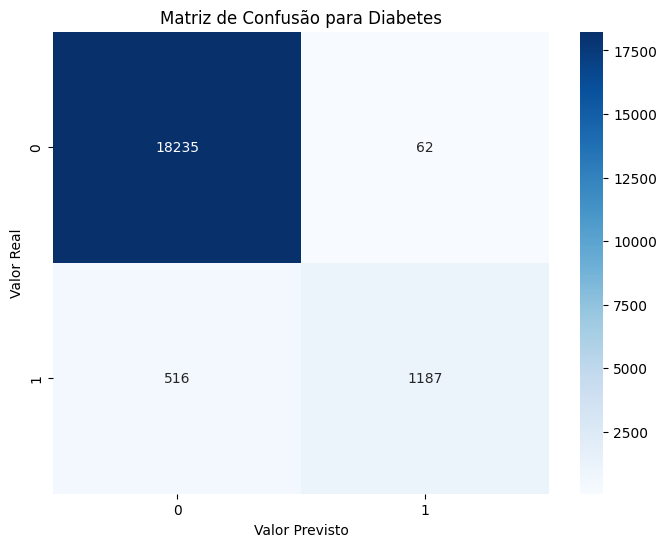

In [22]:
#Matriz de confusão.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão para Diabetes')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()